# Extracting Data from the StreamPipes data lake

In the first example ([Introduction to the StreamPipes Python client]()) we took the first steps with the StreamPipes Python client and learned how to set everything up.
Now we are ready to get started and want to retrieve some data out of StreamPipes.
In this tutorial, we'll focus on the StreamPipes Data Lake, the component where StreamPipes stores data internally.
To get started, we'll use the `client` instance created in the first tutorial.

In [1]:
from streampipes_client.client import StreamPipesClient
from streampipes_client.client.client_config import StreamPipesClientConfig
from streampipes_client.client.credential_provider import StreamPipesApiKeyCredentials

In [2]:
import os
os.environ["USER"] = "admin@streampipes.apache.org"
os.environ["API-KEY"] = "XXX"


In [3]:
config = StreamPipesClientConfig(
    credential_provider=StreamPipesApiKeyCredentials.from_env(username_env="USER", api_key_env="API-KEY"),
    host_address="localhost",
    https_disabled=True,
    port=80
)

In [4]:
client = StreamPipesClient(client_config=config)

2022-12-04 21:19:21,832 - streampipes_client.client.client - [INFO] - [client.py:127] [_set_up_logging] - Logging successfully initialized with logging level INFO.


As a first step, we want to get an overview about all data available in the data lake.
The data is stored as so-called `measures`, which refer to a data stream stored in the data lake.
For his purpose we use the `all()` method of the `dataLakeMeasure` endpoint.

In [5]:
data_lake_measures = client.dataLakeMeasureApi.all()

2022-12-04 21:19:23,599 - streampipes_client.endpoint.endpoint - [INFO] - [endpoint.py:153] [_make_request] - Successfully retrieved all resources.


So let's see how many measures are available

In [6]:
len(data_lake_measures)

2

All resources of the StreamPipes Python client support the standard Python expressions. If not, [please let us know](https://github.com/apache/streampipes/issues/new/choose).

In [7]:
data_lake_measures[-1]

DataLakeMeasure(element_id='urn:streampipes.apache.org:spi:datalakemeasure:xLSfXZ', measure_name='test', timestamp_field='s0::timestamp', event_schema=EventSchema(element_id='urn:streampipes.apache.org:spi:eventschema:UDMHXn', event_properties=[EventProperty(element_id='urn:streampipes.apache.org:spi:eventpropertyprimitive:utvSWg', label='Density', description='Denotes the current density of the fluid', runtime_name='density', required=False, domain_properties=['http://schema.org/Number'], event_property_qualities=[], requires_event_property_qualities=[], property_scope='MEASUREMENT_PROPERTY', index=5, runtime_id=None, runtime_type='http://www.w3.org/2001/XMLSchema#float', measurement_unit=None, value_specification=None), EventProperty(element_id='urn:streampipes.apache.org:spi:eventpropertyprimitive:bzJeLS', label='Mass Flow', description='Denotes the current mass flow in the sensor', runtime_name='mass_flow', required=False, domain_properties=['http://schema.org/Number'], event_prope

To ge a more comprehensive overview you can take a look at the `pandas` representation

In [8]:
display(data_lake_measures.to_pandas())

,measure_name,timestamp_field,pipeline_id,pipeline_name,pipeline_is_running,num_event_properties
0,flow-rate,s0::timestamp,None,None,False,3
1,test,s0::timestamp,None,None,False,6


So far, we have only retrieved metadata about the available data lake measure.
In the following, we will access the actual data of the measure `flow-rate`.

For this purpose, we will use the `get()` method of the `dataLakeMeasure` endpoint.

In [9]:
flow_rate_measure = client.dataLakeMeasureApi.get(identifier="flow-rate")

2022-12-04 21:19:30,505 - streampipes_client.endpoint.endpoint - [INFO] - [endpoint.py:153] [_make_request] - Successfully retrieved all resources.


For further processing, the easiest way is to turn the data measure into a `pandas DataFrame`.

In [10]:
flow_rate_pd = flow_rate_measure.to_pandas()

Let's see how many data points we got...

In [11]:
len(flow_rate_pd)

2020

... and get a first overview

In [12]:
flow_rate_pd.describe()

,mass_flow,temperature
count,2020.000000,2020.000000
mean,4.976635,52.688616
std,2.920448,8.756244
min,0.003300,40.002800
25%,2.443325,45.250551
50%,4.886400,50.289900
75%,7.524550,60.050674
max,9.997400,69.993896


As a final step, we want to create a plot of both attributes

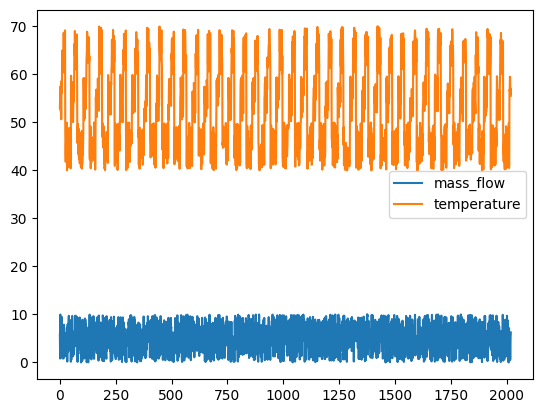

In [13]:
import matplotlib.pyplot as plt
flow_rate_pd.plot(y=["mass_flow", "temperature"])
plt.show()

... from this point on we leave all future processing of the data up to your creativity.
Keep in mind: the general syntax used in this example (`all()`, `to_pandas()`, `get()`) applies to all endpoints and associated resources of the StreamPipes Python client.

If you get further and create exiting stuff with data extracted from StreamPipes please [let us know](https://github.com/apache/streampipes/discussions/categories/show-and-tell).
We are thrilled to see what you as a community will build with the provided client.
Furthermore, don't hesitate to discuss [feature requests](https://github.com/apache/streampipes/discussions/812) to extend the current functionality with us.

How do you like this tutorial?
We hope you like it and would love to receive some feedback from you.
Just go to our [GitHub discussion page](https://github.com/apache/streampipes/discussions) and let us know your impression.
We'll read and react to them all, we promise!